In [115]:
import ipywidgets

In [1]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
brain = pd.read_csv('../data/zonetab-mel-animal-1.csv')

left_hemisphere = brain[brain.h == 'l']

ides = left_hemisphere.id.values + 1
target = left_hemisphere.zone.values

left_hemisphere = left_hemisphere.iloc[:, [1, 2, 3]].to_numpy()

In [118]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import copy

In [119]:
def interactive_plot(data, labels, title):
    current_state = {str(cluster_id):widgets.Checkbox() for cluster_id in np.unique(labels)}
    current_state['all'] = widgets.Checkbox(True)
    
    def draw(**checkboxes):
        nonlocal data
        nonlocal labels
        nonlocal title
        
        if checkboxes['all']:
            copy_labels = labels
        else:
            copy_labels = np.array([label if checkboxes[str(label)] else 0 for label in labels])
        
        plt.close('all')
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(elev=90, azim=90)
        ax.scatter(data[copy_labels != 0][:, 0], 
                   data[copy_labels != 0][:, 1], 
                   data[copy_labels != 0][:, 2], 
                   c=copy_labels[copy_labels != 0])
        ax.set_title(title)
        plt.show()
        
    interact(draw, **current_state)

In [120]:
interactive_plot(left_hemisphere, target, 'real')

interactive(children=(Checkbox(value=False, description='1'), Checkbox(value=False, description='2'), Checkbox…

In [20]:
def get_labels_for_graph_partition(path_to_partition):
    cluster_id = 1
    data = np.array([])

    with open(path_to_partition, 'r') as partition:
        partition.readline()

        for cluster in partition.readlines():
            vertices = np.array(list(map(int, cluster.split())))
            labels = np.array([cluster_id] * len(vertices))
            cluster_id += 1
            tmp = np.concatenate(([vertices], [labels]), axis=0)

            if 0 in data.shape:
                data = tmp
            else:
                data = np.append(data, tmp, axis=1)

    return pd.DataFrame(np.transpose(data), columns=['vertex_ID', 'cluster_ID'])


def reorder_labels(data, vertex_IDs):
    labels = [0] * len(vertex_IDs)
    data_dict = pd.Series(data.cluster_ID.values, index=data.vertex_ID).to_dict()
    
    for index in range(len(vertex_IDs)):
        labels[index] = data_dict[vertex_IDs[index] - 1]
        
    return np.array(labels)

In [21]:
interactive_plot(left_hemisphere, reorder_labels(get_labels_for_graph_partition('./partition'), ides), 'genetic')

interactive(children=(Checkbox(value=False, description='1'), Checkbox(value=False, description='2'), Checkbox…

In [3]:
data = pd.read_csv('../pipeline/zonetab-mel-animal-3-l/genetic_vs_real.csv')

In [46]:
index = 0

fig, axs = plt.subplots(26, figsize=(24, 24))
fig.tight_layout(pad=4.0)

for indices, row in data.iterrows():
    gained_clusters_ides = row.keys().values[1:]
    tmp = np.array(row.array)
    real_cluster_id = tmp[0]
    data_structure = tmp[1:]
    axs[index].pie(data_structure, labels=gained_clusters_ides, autopct='%1.2f%%')
    axs[index].set_title(str(real_cluster_id))
    index += 1

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


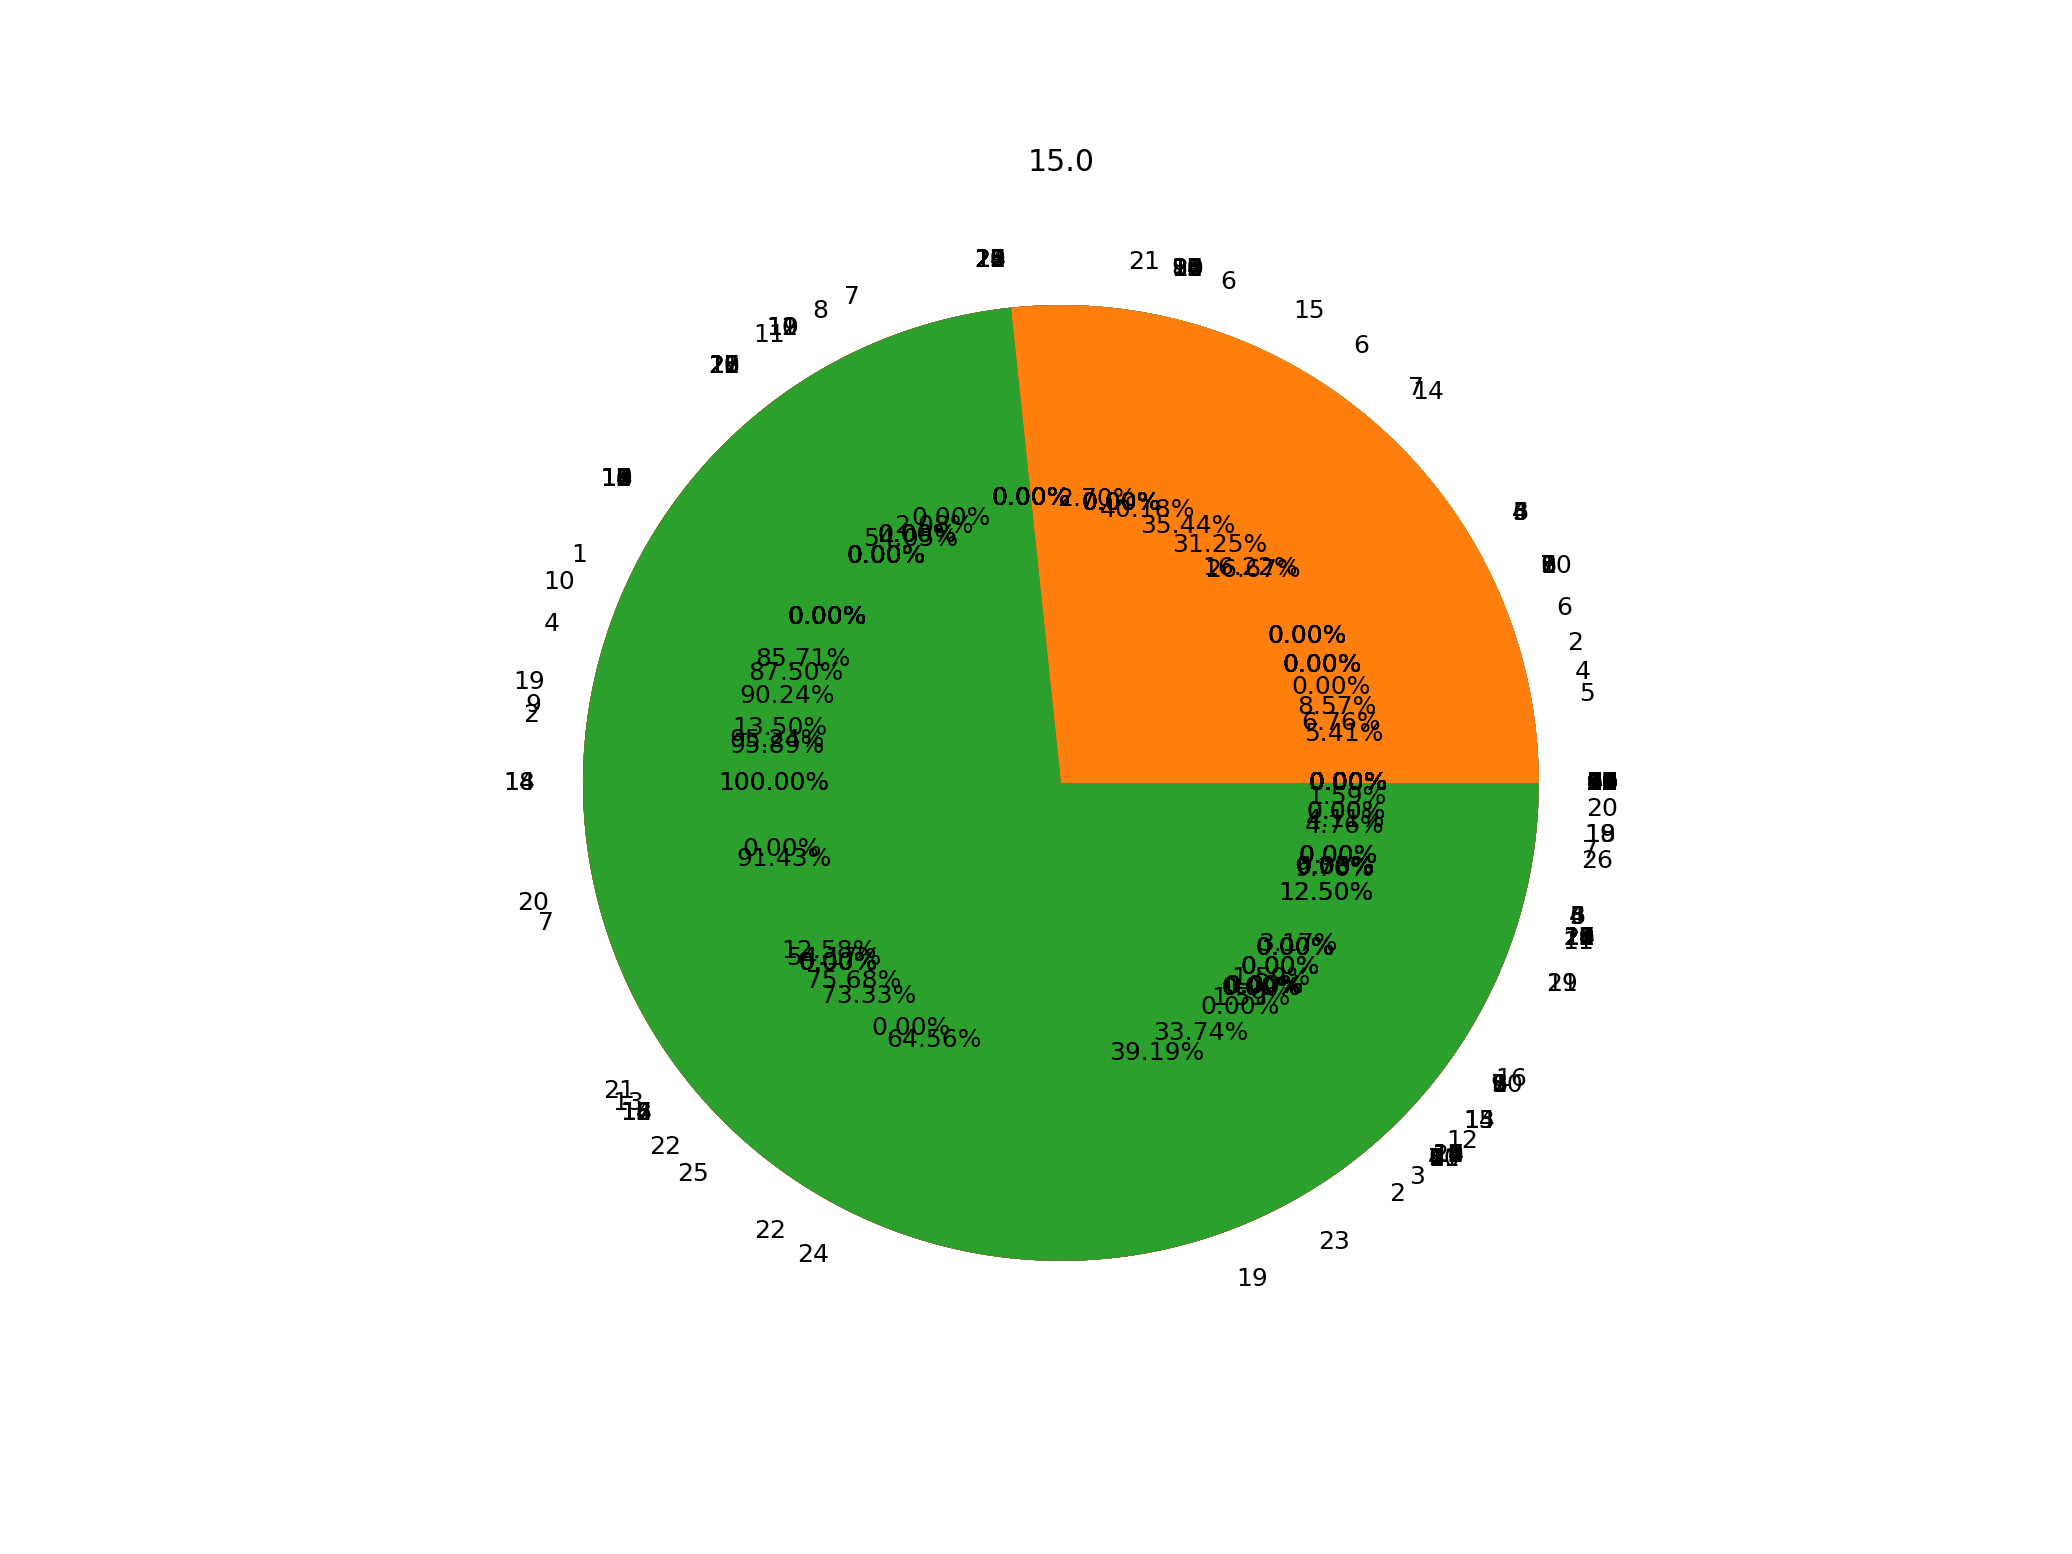

In [42]:
for index, row in data.iterrows():
    gained_clusters_ides = row.keys().values[1:]
    tmp = np.array(row.array)
    real_cluster_id = tmp[0]
    data_structure = tmp[1:]
    plt.pie(data_structure, labels=gained_clusters_ides, autopct='%1.2f%%')
    plt.title(real_cluster_id)
    plt.show()